# Microsoft Malware Detection 

# Exploratory Data Analysis

In [63]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import warnings 
warnings.filterwarnings('ignore')

In [64]:
source='train'
destination='byteFiles'

#check if bytefile name directory exists or not if not then create new directory with bytefile name 
if not os.path.isdir(destination):
    os.mkdir(destination)

#if directory with name train present then separate .asm files and .byte files into separate directory with names byteFiles and asmFiles 
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            source_path = os.path.join(source, file)
            destination_path = os.path.join(destination, file)

            # Move the file from source to destination
            shutil.move(source_path, destination_path)

# Distribution of Malware Classes  

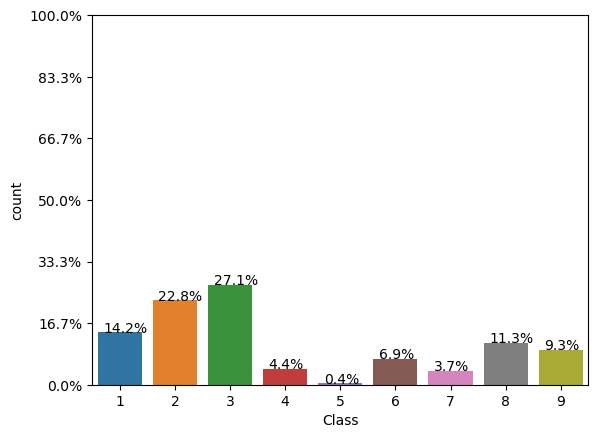

In [65]:
classY=pd.read_csv("trainLabels.csv")
total = len(classY)
ax=sns.countplot(x="Class", data=classY)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 7))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

# Feature Extraction

File Size as a Feature 

In [66]:
source='byteFiles'
files=os.listdir(source)
filenames=classY['Id'].tolist()
class_Y=classY['Class'].tolist()
class_byte_file=[]
class_byte_size=[]
byte_file_name=[]

for file in files: 
    source_path = os.path.join(source, file)
    info=os.stat(source_path)
    file=file.split('.')[0]
    if any (file == filename for filename in filenames):
        i=filename.index(file)
        class_byte_file.append(class_Y[i])
        class_byte_size.append(info.st_size/(1024*1024))
        byte_file_name.append(file)
data_size_byte=pd.DataFrame({'ID':byte_file_name,'size':class_byte_size,'Class':class_byte_file})             

In [67]:
data_size_byte.head()

,ID,size,Class
0,fuso63yW7wAXO20gJIBS,1.260254,1
1,8jrxyaQiGJb5qcsOmMAv,8.312012,2
2,3UV6IekO5Y2pKRB7D1g9,8.099609,3
3,Dvs1tiIfjYZJcV0dT2rS,6.811035,2
4,8KeOIvQaxRdsU7mu6CrL,6.234161,2


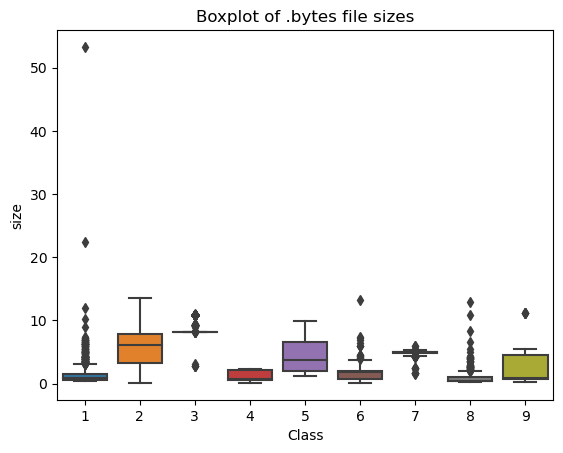

In [68]:
ax=sns.boxplot(x='Class',data=data_size_byte,y='size')
plt.title('Boxplot of .bytes file sizes')
plt.show()

Creating unigram features from byte file 

In [69]:
source='byteFiles'
files=os.listdir(source)
source_path = os.path.join(source, file)


for file in files:
    file=file.split('.')[0]
    text_file=open('byteFiles/'+file+".txt",'w+')
    file=file+'.bytes'
    with open('byteFiles/'+file,'r') as fp:
        lines=" "
        for line in fp:
            a=line.rstrip().split(" ")[1:]
            b=' '.join(a)
            b=b+'\n'
            text_file.write(b)
        fp.close()
        os.remove('byteFiles/'+file)
    text_file.close()             

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0

In [72]:
#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

KeyboardInterrupt: 

In [76]:
byte_features=pd.read_csv('result.csv')
byte_features['ID']=byte_features['ID'].str.split(".").str[0]

In [77]:
byte_features.head()

,ID,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,2804,3687,3101,3211,3097,2758,3099,2759,5753,1824
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,451,6536,439,281,302,7639,518,17001,54902,8588
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2325,2358,2242,2885,2863,2471,2786,2680,49144,468
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,478,873,485,462,516,1133,471,761,7998,13940
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,847,947,350,209,239,653,221,242,2199,9008


In [83]:
bye_features_with_size=pd.merge(byte_features,data_size_byte,on='ID',how='left')
print(bye_features_with_size.head())
bye_features_with_size.isnull().sum()

                     ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824  5.012695   
1  9291  ...   439   281   302  7639   518  17001  54902   8588  6.556152   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468  4.602051   
3  1078  ...   485   462   516  1133   471    761   7998  13940  0.679688   
4   422  ...   350   209   239   653   221    242   2199   9008  0.438965   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows

ID       0
0        0
1        0
2        0
3        0
        ..
fe       0
ff       0
??       0
size     0
Class    0
Length: 260, dtype: int64

ID       0
0        0
1        0
2        0
3        0
        ..
fe       0
ff       0
??       0
size     0
Class    0
Length: 260, dtype: int64